##Este Notebook veremos como usar la imputación de MV mediante la técnica de K-NN.

La manera más sencilla es usar la función KNNImputer de la libreria ScikitLearn.

Pueden encontrar información de la función [AQUI](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

In [6]:
# Primero importaremos lo necesario

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

Usaremos el data set de ejemplo sencillo primero:

In [2]:
datos = {'estudiante': ['Zutano', 'Mengano', 'Zutano','Pepe' ,'Fulanito, Cosme', 'Maria', 'Juan', 'Pablo', 'Ana'],
         'Primera prueba': [np.nan, 8.5,7,7,np.nan, 4.5, 7.5, 1.0, 8.8],
         'Segunda prueba': [10,np.nan,9.8,4,np.nan,np.nan, 2.5, np.nan, np.nan],
         'observaciones':['ninguna','libre','ninguna','ninguna','libre','oyente','ninguna','libre','oyente'],
         'DNI':[23000000, 12389100,23000000, 99999, 1001,30406011, 1230000, 86758444, 9996696]}
df = pd.DataFrame(datos)
df

,estudiante,Primera prueba,Segunda prueba,observaciones,DNI
0,Zutano,NaN,10.0,ninguna,23000000
1,Mengano,8.5,NaN,libre,12389100
2,Zutano,7.0,9.8,ninguna,23000000
3,Pepe,7.0,4.0,ninguna,99999
4,"Fulanito, Cosme",NaN,NaN,libre,1001
5,Maria,4.5,NaN,oyente,30406011
6,Juan,7.5,2.5,ninguna,1230000
7,Pablo,1.0,NaN,libre,86758444
8,Ana,8.8,NaN,oyente,9996696


In [3]:
# Vamos a crear una copia de los datos originales
datos_knn = datos.copy()
datos_knn = pd.DataFrame(datos_knn)
datos_knn

,estudiante,Primera prueba,Segunda prueba,observaciones,DNI
0,Zutano,NaN,10.0,ninguna,23000000
1,Mengano,8.5,NaN,libre,12389100
2,Zutano,7.0,9.8,ninguna,23000000
3,Pepe,7.0,4.0,ninguna,99999
4,"Fulanito, Cosme",NaN,NaN,libre,1001
5,Maria,4.5,NaN,oyente,30406011
6,Juan,7.5,2.5,ninguna,1230000
7,Pablo,1.0,NaN,libre,86758444
8,Ana,8.8,NaN,oyente,9996696


In [4]:
# Creamos un objeto de KNN imputer. con 2 vecinos y parámetro weights = uniform. AVERIGUE QUE SIGNIFIQUE ESTE ULTIMO PARAMETRO!!
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

###Es importante entregarle variables con datos numéricos. Ya que se calculan distancias y la distancia por defecto es la Euclidiana.



In [5]:
datos_knn[['Primera prueba', 'Segunda prueba']] = knn_imputer.fit_transform(datos_knn[['Primera prueba', 'Segunda prueba']])
datos_knn

,estudiante,Primera prueba,Segunda prueba,observaciones,DNI
0,Zutano,7.000000,10.000,ninguna,23000000
1,Mengano,8.500000,6.150,libre,12389100
2,Zutano,7.000000,9.800,ninguna,23000000
3,Pepe,7.000000,4.000,ninguna,99999
4,"Fulanito, Cosme",6.328571,6.575,libre,1001
5,Maria,4.500000,6.900,oyente,30406011
6,Juan,7.500000,2.500,ninguna,1230000
7,Pablo,1.000000,6.900,libre,86758444
8,Ana,8.800000,6.150,oyente,9996696


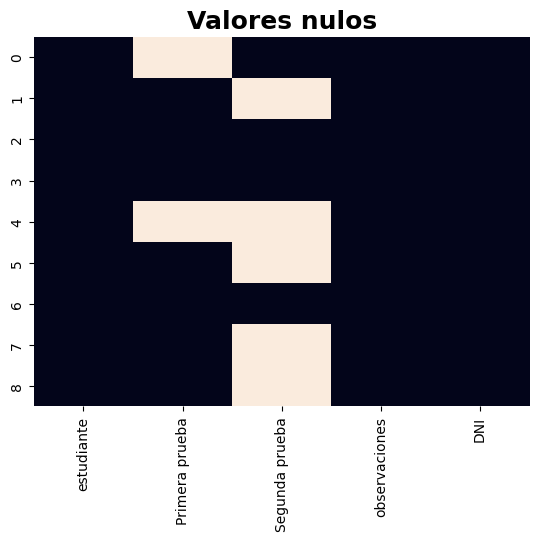

In [7]:
# Revisamos los nulos visualmente

sns.heatmap(df.isnull(), cbar=False)
plt.title("Valores nulos", fontsize=18, fontweight="bold");

## Entendiendo a KNNImputer

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
np.array(X)

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

In [ ]:
KNNImputer(n_neighbors=1).fit_transform(X)

array([[1., 2., 3.],
       [3., 4., 3.],
       [3., 6., 5.],
       [8., 8., 7.]])

In [ ]:
KNNImputer(n_neighbors=2).fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [ ]:
from sklearn.metrics.pairwise import nan_euclidean_distances
nan_euclidean_distances(X,X)

array([[ 0.        ,  3.46410162,  6.92820323, 11.29158979],
       [ 3.46410162,  0.        ,  3.46410162,  7.54983444],
       [ 6.92820323,  3.46410162,  0.        ,  3.46410162],
       [11.29158979,  7.54983444,  3.46410162,  0.        ]])

Explicando los valores ...

$a_{3,1} = (8+3)/2 = 5.5$

$a_{1,3} = (3+5)/2 = 4.0$

In [ ]:
# Use 3 neighbors
KNNImputer(n_neighbors=3).fit_transform(X)

array([[1., 2., 5.],
       [3., 4., 3.],
       [4., 6., 5.],
       [8., 8., 7.]])

Explicando los valores ...

$a_{3,1} = (8+3+1)/3 = 4.0$

$a_{1,3} = (3+5+7)/3 = 5.0$

Usamos un nuevo parámetro que le indica los pesos

In [ ]:
from sklearn.metrics.pairwise import nan_euclidean_distances
import numpy as np
X = [[3, np.nan, 5]]
Y = [[1,0,0]]
nan_euclidean_distances(X,Y)

array([[6.59545298]])

$d_{xy}=\sqrt{weight*\textit{squared distance from presente coordinates}}$

donde

$weight=\frac{\textit{Total number of coordinates}}{\textit{Number of present coordinates}}$

In [ ]:
np.sqrt(3*((3-1)*(3-1) + 5*5)/2)

6.59545297913646

In [ ]:
X = [[3, np.nan, 5], [1,0,0]]
nan_euclidean_distances(X,X)

array([[0.        , 6.59545298],
       [6.59545298, 0.        ]])

In [ ]:
X = [[2,0],[2,2],[3,3]]
nan_euclidean_distances(X,X)

array([[0.        , 2.        , 3.16227766],
       [2.        , 0.        , 1.41421356],
       [3.16227766, 1.41421356, 0.        ]])

Sabiendo que A=(2,0), B=(2,2) y C =(3,3) y considerando la matriz de distancias, se concluye que:
+ El punto más cercano a A es B
+ El punto más cercano a B es C
+ El punto más cercano a C es B

In [ ]:
p = np.array((2, 0))
q = np.array((2, 2))
r = np.array((3, 3))
# calculating Euclidean distance
# using linalg.norm()
print(np.linalg.norm(p - q))
print(np.linalg.norm(p - r))

2.0
3.1622776601683795


# Usando valores nulos

In [ ]:
X = [[3, np.nan, 5], [1,0,0], [3,3,3]]
# Matriz de distancias euclidianas
nan_euclidean_distances(X,X)

array([[0.        , 6.59545298, 2.44948974],
       [6.59545298, 0.        , 4.69041576],
       [2.44948974, 4.69041576, 0.        ]])

In [ ]:
np.array(X)

array([[ 3., nan,  5.],
       [ 1.,  0.,  0.],
       [ 3.,  3.,  3.]])

In [ ]:
KNNImputer(n_neighbors=1).fit_transform(X)

array([[3., 3., 5.],
       [1., 0., 0.],
       [3., 3., 3.]])

In [ ]:
KNNImputer(n_neighbors=2).fit_transform(X)

array([[3. , 1.5, 5. ],
       [1. , 0. , 0. ],
       [3. , 3. , 3. ]])

In [ ]:
KNNImputer(n_neighbors=1, weights="distance").fit_transform(X)

array([[3., 3., 5.],
       [1., 0., 0.],
       [3., 3., 3.]])

In [ ]:
# El valor de imputación lo obtiene con un promedio ponderado
KNNImputer(n_neighbors=2, weights="distance").fit_transform(X)

array([[3.        , 2.18756045, 5.        ],
       [1.        , 0.        , 0.        ],
       [3.        , 3.        , 3.        ]])

El valor imputado lo saca obtieniendo el promedio ponderado de las distancias; acá la explicación del cálculo:

In [ ]:
nan_euclidean_distances(X,X)[0,2]/(1/nan_euclidean_distances(X,X)[0,1] + 1/nan_euclidean_distances(X,X)[0,2])/2

2.1875604462877187

In [ ]:
imputados_uniform = KNNImputer(n_neighbors=2).fit_transform(X)
imputados_distance = KNNImputer(n_neighbors=2, weights="distance").fit_transform(X)

In [ ]:
np.array(X)

array([[ 3., nan,  5.],
       [ 1.,  0.,  0.],
       [ 3.,  3.,  3.]])

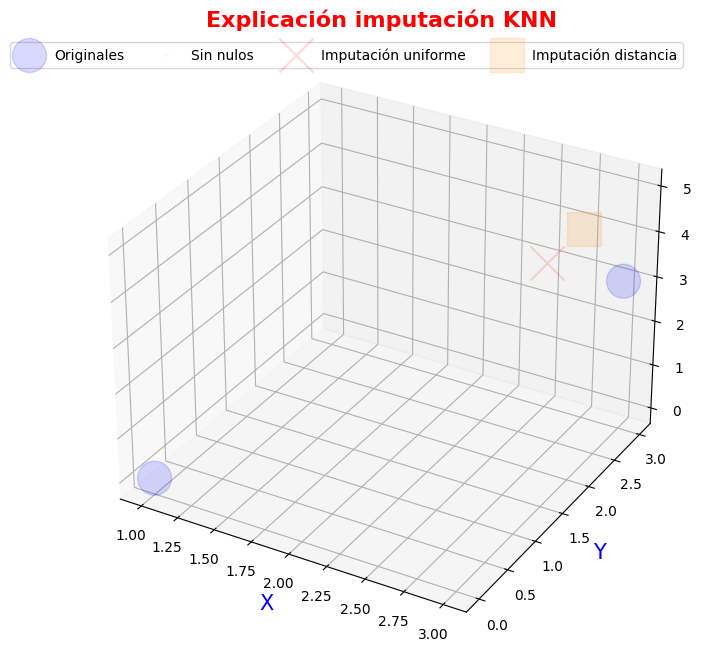

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
filtro = ~np.isnan(np.array(X).T[1])
ax = fig.add_subplot(1,1,1, projection="3d")
ax.scatter(np.array(X).T[0][filtro],
           np.array(X).T[1][filtro],
           np.array(X).T[2][filtro],
           label="Originales", marker="o", c="blue", s=600, alpha=0.15)
ax.scatter(np.array(X).T[0][~filtro],
           np.array(X).T[1][~filtro],
           np.array(X).T[2][~filtro],
           label="Sin nulos", marker="*", c="cyan", s=600, alpha=0.15)
ax.scatter(imputados_uniform.T[0][~filtro],
           imputados_uniform.T[1][~filtro],
           imputados_uniform.T[2][~filtro],
           label="Imputación uniforme", marker="x", c="red", s=600, alpha=0.15)
ax.scatter(imputados_distance.T[0][~filtro],
           imputados_distance.T[1][~filtro],
           imputados_distance.T[2][~filtro],
           label="Imputación distancia", marker="s", c="darkorange", s=600, alpha=0.15)
ax.set_xlabel("X", fontsize=15, color="blue")
ax.set_ylabel("Y", fontsize=15, color="blue")
ax.set_zlabel("Z", fontsize=15, color="blue")
ax.legend(ncol=4)
plt.title("Explicación imputación KNN", fontsize=16, fontweight="bold", color="red");

Ejemplo simple

In [ ]:
import numpy as np
X = [[1,2,3], [np.nan,4,5],[6,np.nan,7],[8,9,10], [11,12,np.nan]]
np.array(X)

array([[ 1.,  2.,  3.],
       [nan,  4.,  5.],
       [ 6., nan,  7.],
       [ 8.,  9., 10.],
       [11., 12., nan]])

In [ ]:
nan_euclidean_distances(X,X)

array([[ 0.        ,  3.46410162,  7.84219357, 12.12435565, 17.32050808],
       [ 3.46410162,  0.        ,  3.46410162,  8.66025404, 13.85640646],
       [ 7.84219357,  3.46410162,  0.        ,  4.41588043,  8.66025404],
       [12.12435565,  8.66025404,  4.41588043,  0.        ,  5.19615242],
       [17.32050808, 13.85640646,  8.66025404,  5.19615242,  0.        ]])

In [ ]:
KNNImputer(n_neighbors=1, weights="uniform").fit_transform(X)

array([[ 1.,  2.,  3.],
       [ 1.,  4.,  5.],
       [ 6.,  4.,  7.],
       [ 8.,  9., 10.],
       [11., 12., 10.]])

In [ ]:
KNNImputer(n_neighbors=1, weights="distance").fit_transform(X)

array([[ 1.,  2.,  3.],
       [ 1.,  4.,  5.],
       [ 6.,  4.,  7.],
       [ 8.,  9., 10.],
       [11., 12., 10.]])


---
Trabajando con 2 vecinos más cercanos

---

In [ ]:
np.array(X)

array([[ 1.,  2.,  3.],
       [nan,  4.,  5.],
       [ 6., nan,  7.],
       [ 8.,  9., 10.],
       [11., 12., nan]])

In [ ]:
nan_euclidean_distances(X,X)

array([[ 0.        ,  3.46410162,  7.84219357, 12.12435565, 17.32050808],
       [ 3.46410162,  0.        ,  3.46410162,  8.66025404, 13.85640646],
       [ 7.84219357,  3.46410162,  0.        ,  4.41588043,  8.66025404],
       [12.12435565,  8.66025404,  4.41588043,  0.        ,  5.19615242],
       [17.32050808, 13.85640646,  8.66025404,  5.19615242,  0.        ]])

In [ ]:
KNNImputer(n_neighbors=2, weights="uniform").fit_transform(X)

array([[ 1. ,  2. ,  3. ],
       [ 3.5,  4. ,  5. ],
       [ 6. ,  6.5,  7. ],
       [ 8. ,  9. , 10. ],
       [11. , 12. ,  8.5]])

In [ ]:
KNNImputer(n_neighbors=2, weights="distance").fit_transform(X)

array([[ 1.        ,  2.        ,  3.        ],
       [ 3.5       ,  4.        ,  5.        ],
       [ 6.        ,  6.19803903,  7.        ],
       [ 8.        ,  9.        , 10.        ],
       [11.        , 12.        ,  8.875     ]])

6.19?
Según las distancias calculadas, los vectores más cercanos son el anterior y el siguiente (en ese orden)

Según la fórmula debería ser:
RAIZ(3/2(25+25)) = RAIZ(75)

In [ ]:
KNNImputer(n_neighbors=4, weights="uniform").fit_transform(X)

array([[ 1.  ,  2.  ,  3.  ],
       [ 6.5 ,  4.  ,  5.  ],
       [ 6.  ,  6.75,  7.  ],
       [ 8.  ,  9.  , 10.  ],
       [11.  , 12.  ,  6.25]])

In [ ]:
from sklearn.metrics.pairwise import nan_euclidean_distances
nan_euclidean_distances(X,X)

array([[ 0.        ,  3.46410162,  7.84219357, 12.12435565, 17.32050808],
       [ 3.46410162,  0.        ,  3.46410162,  8.66025404, 13.85640646],
       [ 7.84219357,  3.46410162,  0.        ,  4.41588043,  8.66025404],
       [12.12435565,  8.66025404,  4.41588043,  0.        ,  5.19615242],
       [17.32050808, 13.85640646,  8.66025404,  5.19615242,  0.        ]])

## Ejemplo básico

In [ ]:
X = [[3, np.nan, 5], [1,0,0], [3,3,3]]
np.array(X)

array([[ 3., nan,  5.],
       [ 1.,  0.,  0.],
       [ 3.,  3.,  3.]])

In [ ]:
from sklearn.metrics.pairwise import nan_euclidean_distances
nan_euclidean_distances(X,X)

array([[0.        , 6.59545298, 2.44948974],
       [6.59545298, 0.        , 4.69041576],
       [2.44948974, 4.69041576, 0.        ]])

In [ ]:
KNNImputer(n_neighbors=1, weights="distance").fit_transform(X)

array([[3., 3., 5.],
       [1., 0., 0.],
       [3., 3., 3.]])

In [ ]:
KNNImputer(n_neighbors=2, weights="distance").fit_transform(X)

array([[3.        , 2.18756045, 5.        ],
       [1.        , 0.        , 0.        ],
       [3.        , 3.        , 3.        ]])

In [ ]:
from sklearn.metrics.pairwise import nan_euclidean_distances
print(np.array(X))
print("*"*10)
print(nan_euclidean_distances(np.array(X[1]).reshape(1,3),
                        np.array(X[2]).reshape(1,3)))
print(nan_euclidean_distances(np.array(X[2]).reshape(-1,3),
                        np.array(X[3]).reshape(-1,3)))

[[ 1.  2. nan]
 [ 3.  4.  3.]
 [nan  6.  5.]
 [ 8.  8.  7.]]
**********
[[3.46410162]]
[[3.46410162]]


In [ ]:
nan_euclidean_distances(X,X)

array([[ 0.        ,  3.46410162,  6.92820323, 11.29158979],
       [ 3.46410162,  0.        ,  3.46410162,  7.54983444],
       [ 6.92820323,  3.46410162,  0.        ,  3.46410162],
       [11.29158979,  7.54983444,  3.46410162,  0.        ]])

In [ ]:
KNNImputer(n_neighbors=3, weights="distance").fit_transform(X)

array([[1.        , 2.        , 4.23265511],
       [3.        , 4.        , 3.        ],
       [4.6       , 6.        , 5.        ],
       [8.        , 8.        , 7.        ]])

**Explicación**

![](https://lh4.googleusercontent.com/iIecYWAJ08ZMkqbkTEYFOJvVwJvVk6kst80v2QQh0QIUMaphrNeEnlGwP1H8gupSnCM2X2YEMsnyecVstXhUkAHnOMH03zMdNmvSIcotz36ApnKa_SE3v9-BQnPRN_76uslOMH1i)

![](https://lh3.googleusercontent.com/XoAmDPvK6VdXeR1Tvbre0GGPrVhjt0lKfsctH_U_DO4nTLMEQzFe0Cavzs50kqHdvBr483UA5HxJEOptHxBYtyRY5FTON28Yj4Q70oCeh-4Opk5KXojX5BwqUAEJRn2xiHtLoRdU)

![](https://lh5.googleusercontent.com/Ifp1O-KCM1gG0aQXXJbT3RLtTNC1eICgKhFZ89p25jzvujerKmEcn9nFXWVls16oZ-aWxBu7k4iockd3ohWyFh_jga8589F6Ra8h2lLc959pBClCGdGPoZhx0kbYnOlD4cRKK5fM)

![](https://lh5.googleusercontent.com/nPFpe1oPKYB1xUwU4GGxCrAEpi3pNBDckj0Jza5cMFGkA-tjMZAWQzEtqK1DJXJt0ZuOFcCoVymyIUzVEyBl_8bWRhFWA9k7x3AHiMgFxjXYaHzkx7qIQR24u3_p8TJkw6IMBj8i)

In [ ]:
# Compruebo resultado del ejemplo
u = [[3,np.nan,5]]
v = np.array([1,0,0]).reshape(-1,3)
print(u); print(v)
nan_euclidean_distances(u,v)

[[3, nan, 5]]
[[1 0 0]]


array([[6.59545298]])

In [ ]:
u = [[np.nan,6,5]]
v = np.array([3,4,3]).reshape(-1,3)
w = [[8,8,7]]
print(u); print(v)
print(nan_euclidean_distances(u,v))
print(nan_euclidean_distances(u,w))

[[nan, 6, 5]]
[[3 4 3]]
[[3.46410162]]
[[3.46410162]]


###TAREA EN CLASES (15 MINUTOS)

####Pruebe variando el valor de K.

In [8]:
knn_imputer_x = KNNImputer(n_neighbors=3, weights="uniform")
datos_knn_x = pd.DataFrame(datos.copy())
datos_knn_x[['Primera prueba','Segunda prueba']] = knn_imputer_x.fit_transform(datos_knn_x[['Primera prueba','Segunda prueba']])
datos_knn_x

,estudiante,Primera prueba,Segunda prueba,observaciones,DNI
0,Zutano,7.166667,10.000000,ninguna,23000000
1,Mengano,8.500000,5.433333,libre,12389100
2,Zutano,7.000000,9.800000,ninguna,23000000
3,Pepe,7.000000,4.000000,ninguna,99999
4,"Fulanito, Cosme",6.328571,6.575000,libre,1001
5,Maria,4.500000,5.433333,oyente,30406011
6,Juan,7.500000,2.500000,ninguna,1230000
7,Pablo,1.000000,5.433333,libre,86758444
8,Ana,8.800000,5.433333,oyente,9996696


####Pruebe variando el valor de weights.

In [ ]:
knn_imputer_y = KNNImputer(n_neighbors=2, weights="distance")
datos_knn_y = pd.DataFrame(datos.copy())
datos_knn_y[['Primera prueba','Segunda prueba']] = knn_imputer_y.fit_transform(datos_knn_y[['Primera prueba','Segunda prueba']])
datos_knn_y

,alumno,Primera prueba,Segunda prueba,observaciones,DNI
0,Zutano,7.000000,10.00000,ninguna,23000000
1,Mengano,8.500000,5.42000,libre,12389100
2,Zutano,7.000000,9.80000,ninguna,23000000
3,Pepe,7.000000,4.00000,ninguna,99999
4,"Fulanito, Cosme",6.328571,6.57500,libre,1001
5,Maria,4.500000,6.90000,oyente,30406011
6,Juan,7.500000,2.50000,ninguna,1230000
7,Pablo,1.000000,6.90000,libre,86758444
8,Ana,8.800000,5.56129,oyente,9996696


####¿Cómo imputa el MV de Fulanito, Cosme si ambas variables tienen MV?